Empty DataFrame
Columns: [file, obj, ttot, ub]
Index: []
Empty DataFrame
Columns: [file, obj, ttot, ub]
Index: []
WilcoxonResult(statistic=91.5, pvalue=7.16622698935865e-61)
314.90246913580245
313.8796296296296


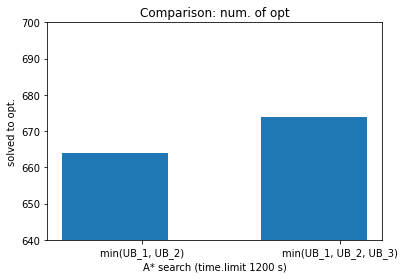

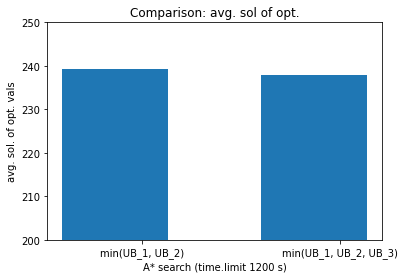

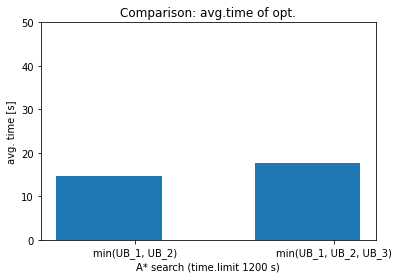

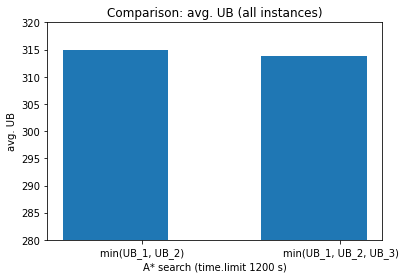

In [95]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

rez_ub12 = pd.read_csv("gclcs-alg-0bs-0guidance-0-feas-0-ub-12.csv", sep="\t")
#print(rez_ub12)

rez_ub123 = pd.read_csv("gclcs-alg-0bs-0guidance-0-feas-0-ub-123.csv", sep="\t")
#print(rez_ub123)

statistika = stats.wilcoxon(rez_ub12["ub"], rez_ub123["ub"])
#print(statistika) # values are not significantly different 

# feas sol
rez_ub12_feas = rez_ub123[rez_ub12["obj"] > 0 ]
rez_ub123_feas = rez_ub123[rez_ub123["obj"] > 0 ]

rez_ub12_feas = rez_ub12_feas.reset_index(); 

#print(rez_ub12_feas.describe())

rez_ub123_feas = rez_ub123_feas.reset_index(); 

fig, ax = plt.subplots()
ax = plt.bar([0, 1.5],  [rez_ub12_feas.count()["index"], rez_ub123_feas.count()["index"] ])
plt.title("Comparison: num. of opt")
plt.xlabel("A* search (time.limit 1200 s)")
plt.ylabel("solved to opt.")
plt.xticks([0.2, 1.7], ["min(UB_1, UB_2)", "min(UB_1, UB_2, UB_3)"])
plt.ylim([640, 700])
#plt.show()
plt.savefig("opt.eps")

# avg. sol quality
fig, ax = plt.subplots()
ax = plt.bar([0, 1.5],  [rez_ub12_feas["obj"].mean(), rez_ub123_feas["obj"].mean() ])
plt.title("Comparison: avg. sol of opt.")
plt.xlabel("A* search (time.limit 1200 s)")
plt.ylabel("avg. sol. of opt. vals")
plt.ylim([200, 250])
plt.xticks([0.2, 1.7], ["min(UB_1, UB_2)", "min(UB_1, UB_2, UB_3)"])
#plt.show()
plt.savefig("sol-avg-opt.eps")

# avg. runtimes of solved
fig, ax = plt.subplots()
ax = plt.bar([0, 1.5],  [rez_ub12_feas["ttot"].mean(), rez_ub123_feas["ttot"].mean() ])
plt.title("Comparison: avg.time of opt.")
plt.xlabel("A* search (time.limit 1200 s)")
plt.ylabel("avg. time [s]")
plt.xticks([0.2, 1.7], ["min(UB_1, UB_2)", "min(UB_1, UB_2, UB_3)"])
plt.ylim([0, 50])
#plt.show()
plt.savefig("time-avg-opt.eps")


# avg. ub of solved
fig, ax = plt.subplots()
ax = plt.bar([0, 1.5],  [rez_ub12["ub"].mean(), rez_ub123["ub"].mean() ])
plt.title("Comparison: avg. UB (all instances)")
plt.xlabel("A* search (time.limit 1200 s)")
plt.ylabel("avg. UB")
plt.ylim([280, 320])
plt.xticks([0.2, 1.7], ["min(UB_1, UB_2)", "min(UB_1, UB_2, UB_3)"])
#plt.show()
plt.savefig("ub-avg-all.eps")


print(rez_ub12[rez_ub12["ub"] > 1000].sort_values(by=["ub"]))
print(rez_ub123[rez_ub123["ub"] > 1000].sort_values(by=["ub"]))

sx = stats.wilcoxon(rez_ub12["ub"], rez_ub123["ub"])
print(sx)

print(rez_ub12["ub"].mean())
print(rez_ub123["ub"].mean())